In [25]:
# 한글 폰트
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [8]:
# 데이터 불러오기
import numpy as np
import pandas as pd

#mandarine_consume = pd.read_excel('normal.xlsx', index_col='년도')
mandarine_consume = pd.read_csv('predict_consume1.csv',encoding = 'UTF-8')
mandarine_consume.head()

,년도,귤도매가격,귤소매가격,오렌지도매가격,오렌지소매가격,생산자물가지수(감귤),소비자물가지수(감귤),1인당 가처분소득,gdp_deflator,1인당 연간소비량(kg)
0,1985,NaN,NaN,NaN,NaN,52.76,37.358,NaN,NaN,9.1
1,1986,NaN,NaN,NaN,NaN,41.75,33.855,NaN,NaN,NaN
2,1987,NaN,NaN,NaN,NaN,50.60,47.416,NaN,NaN,NaN
3,1988,NaN,NaN,NaN,NaN,58.17,45.652,NaN,NaN,NaN
4,1989,NaN,3660.666667,NaN,NaN,63.41,49.120,NaN,NaN,NaN


In [9]:
mandarine_consume.describe()
mandarine_consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   년도             35 non-null     int64  
 1    귤도매가격         24 non-null     float64
 2   귤소매가격          27 non-null     float64
 3   오렌지도매가격        22 non-null     float64
 4   오렌지소매가격        22 non-null     float64
 5   생산자물가지수(감귤)    34 non-null     float64
 6   소비자물가지수(감귤)    35 non-null     float64
 7   1인당 가처분소득      26 non-null     float64
 8   gdp_deflator   26 non-null     float64
 9   1인당 연간소비량(kg)  21 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 2.9 KB


In [10]:
mandarine_consume_df2 = mandarine_consume.dropna()
mandarine_consume_df2

,년도,귤도매가격,귤소매가격,오렌지도매가격,오렌지소매가격,생산자물가지수(감귤),소비자물가지수(감귤),1인당 가처분소득,gdp_deflator,1인당 연간소비량(kg)
15,2000,7417.333333,11800.000000,14240.00000,52580.0,58.74,55.410,61964.6448,72.119,11.9
17,2002,5312.000000,8866.666667,22410.00000,63440.0,84.83,84.325,75338.7816,76.892,13.3
18,2003,9075.000000,26300.000000,17700.00000,56280.0,57.45,63.620,82105.3168,79.544,13.0
19,2004,12609.000000,27000.000000,18720.00000,58280.0,96.77,85.198,90825.8304,82.032,12.0
20,2005,12133.000000,16500.000000,16700.00000,63520.0,143.35,106.735,95684.7528,82.887,13.1
21,2006,13026.000000,31800.000000,18650.00000,63380.0,100.05,84.334,99341.6424,82.702,12.7
22,2007,7101.000000,13100.000000,23090.00000,70610.0,157.50,109.137,107368.2552,84.702,16.0
23,2008,12719.000000,22100.000000,19320.00000,60350.0,59.02,67.663,116943.7992,87.096,13.0
24,2009,11353.000000,19300.000000,27400.00000,80370.0,73.20,93.346,124746.3936,90.239,15.2
25,2010,13191.000000,31200.000000,26020.00000,79850.0,83.75,90.059,135189.7220,92.710,12.4


In [15]:
mandarine_consume.corr()

,년도,귤도매가격,귤소매가격,오렌지도매가격,오렌지소매가격,생산자물가지수(감귤),소비자물가지수(감귤),1인당 가처분소득,gdp_deflator,1인당 연간소비량(kg)
년도,1.000000,0.764349,0.851316,0.609877,-0.694839,0.454754,0.814571,0.990797,0.994077,0.361055
귤도매가격,0.764349,1.000000,0.812873,0.367531,-0.586843,0.223963,0.619246,0.752002,0.751101,-0.461744
귤소매가격,0.851316,0.812873,1.000000,0.311904,-0.481713,0.131533,0.521959,0.811755,0.828845,-0.476248
오렌지도매가격,0.609877,0.367531,0.311904,1.000000,-0.286179,0.332027,0.641034,0.596492,0.585343,0.160953
오렌지소매가격,-0.694839,-0.586843,-0.481713,-0.286179,1.000000,-0.286372,-0.529470,-0.693485,-0.664944,0.285416
생산자물가지수(감귤),0.454754,0.223963,0.131533,0.332027,-0.286372,1.000000,0.785183,0.249317,0.232670,0.248873
소비자물가지수(감귤),0.814571,0.619246,0.521959,0.641034,-0.529470,0.785183,1.000000,0.702352,0.660769,0.238208
1인당 가처분소득,0.990797,0.752002,0.811755,0.596492,-0.693485,0.249317,0.702352,1.000000,0.982201,-0.233859
gdp_deflator,0.994077,0.751101,0.828845,0.585343,-0.664944,0.232670,0.660769,0.982201,1.000000,-0.190785
1인당 연간소비량(kg),0.361055,-0.461744,-0.476248,0.160953,0.285416,0.248873,0.238208,-0.233859,-0.190785,1.000000


In [21]:
y = mandarine_consume_df2.iloc[:,-1]
X = mandarine_consume_df2.iloc[:,1:-1]

In [23]:
X.head()

,귤도매가격,귤소매가격,오렌지도매가격,오렌지소매가격,생산자물가지수(감귤),소비자물가지수(감귤),1인당 가처분소득,gdp_deflator
15,7417.333333,11800.000000,14240.0,52580.0,58.74,55.410,61964.6448,72.119
17,5312.000000,8866.666667,22410.0,63440.0,84.83,84.325,75338.7816,76.892
18,9075.000000,26300.000000,17700.0,56280.0,57.45,63.620,82105.3168,79.544
19,12609.000000,27000.000000,18720.0,58280.0,96.77,85.198,90825.8304,82.032
20,12133.000000,16500.000000,16700.0,63520.0,143.35,106.735,95684.7528,82.887


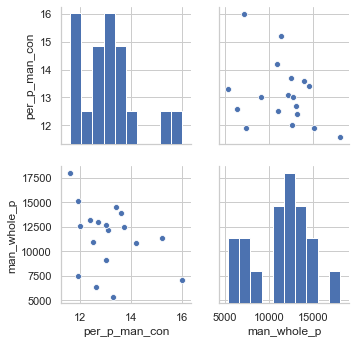

In [21]:
# 뺼놈 per_p_imp_con / one_house / import_ratio_f / import_ratio_p / man_whole_p / oran_whole_p
# 상관관계 있는 놈 per_p_man_con / 
# 그냥..... 망한걸로.......

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
sns.pairplot(mandarine_consume_df2[['per_p_man_con','man_whole_p']], height=2.5)
plt.show()
sns.reset_orig()

C:\Users\82105\Anaconda3\envs\Testing\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\envs\Testing\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\envs\Testing\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\envs\Testing\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\envs\Testing\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\Anaconda3\envs\Testing\lib\site-packages\matp

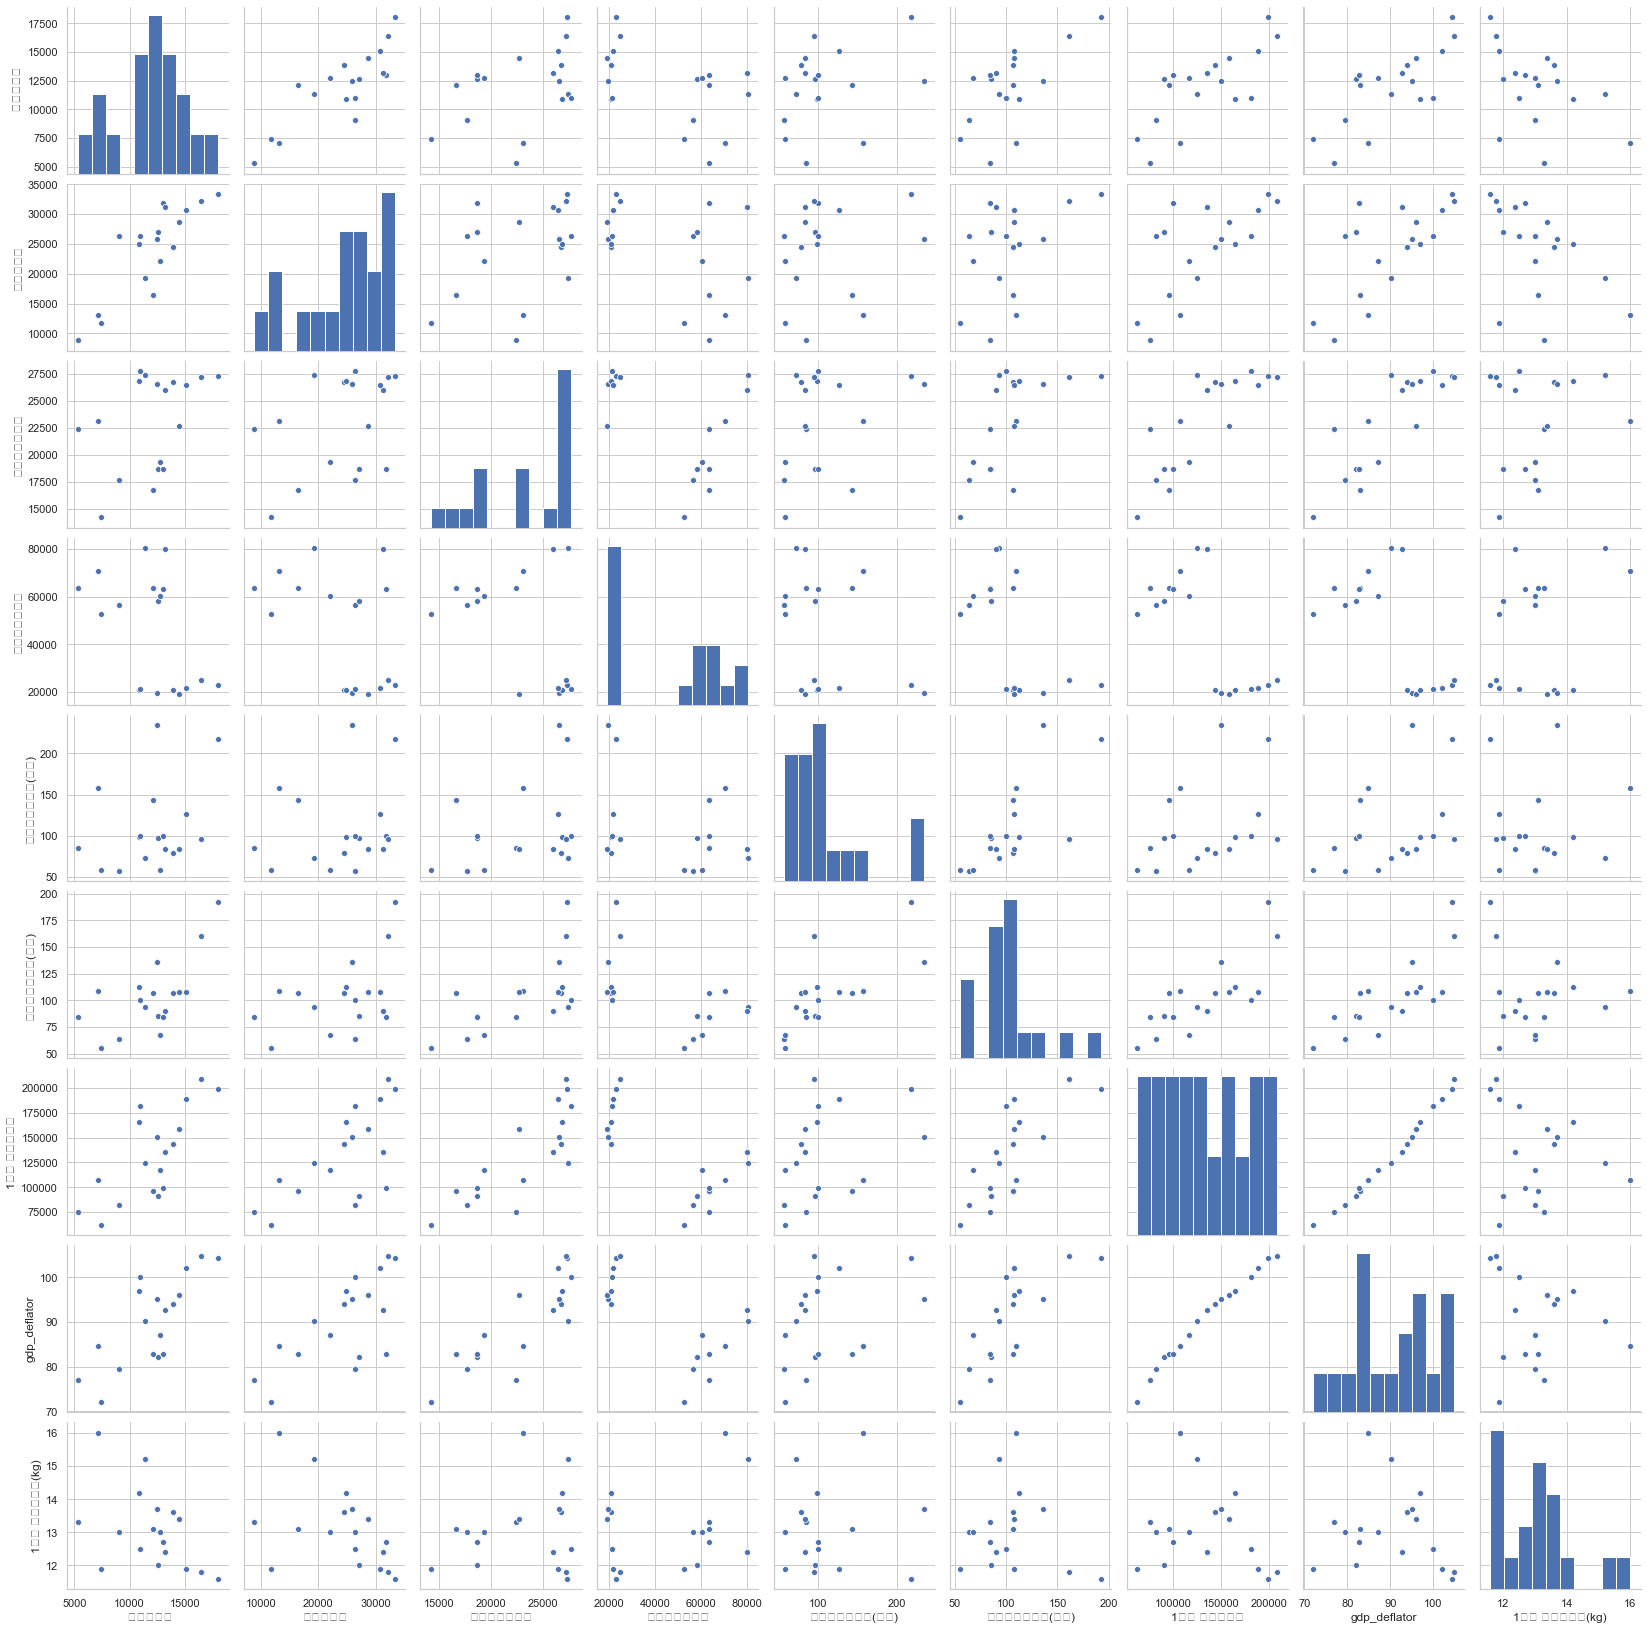

In [24]:
# 변수 선택
# 1. 다중공선성
y = mandarine_consume_df2.iloc[:,0]
X = mandarine_consume_df2.iloc[:,1:]

# version 1
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
sns.pairplot(X, height=2.5)
plt.show()
sns.reset_orig()

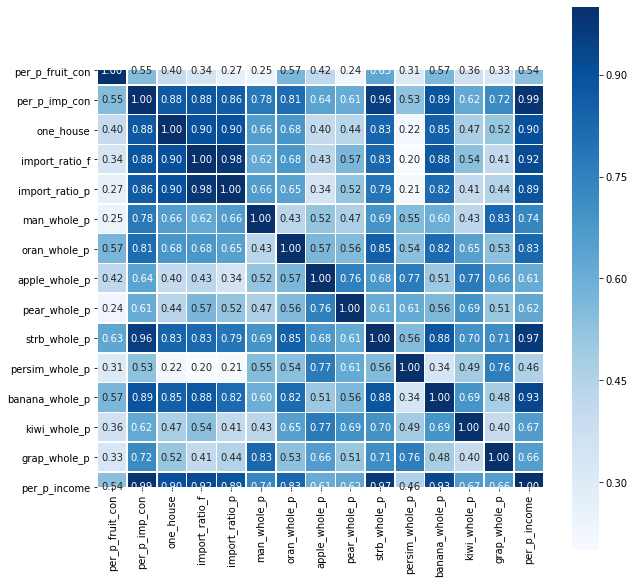

In [5]:
# version 2
plt.figure(figsize=(10,10))
sns.heatmap(data=X.corr(), annot=True, square=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [7]:
# 2. VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif
# 1인당 가처분소득이 눈에 띄게 높음, 빼야 하나...

,VIF Factor,features
0,959.310004,per_p_fruit_con
1,4014.749646,per_p_imp_con
2,355.568480,one_house
3,1087.960682,import_ratio_f
4,672.546551,import_ratio_p
5,287.143147,man_whole_p
6,431.040092,oran_whole_p
7,355.716682,apple_whole_p
8,104.236253,pear_whole_p
9,887.654598,strb_whole_p


In [17]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale, StandardScaler
scale_X = scale(X)
robust_X = robust_scale(X)
minmax_X = minmax_scale(X)
standard_X = StandardScaler().fit(X)

In [16]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

seed = 3
X_train, X_test, y_train, y_test = train_test_split(minmax_X, y, random_state=seed)
result1 = sm.OLS(y_train, X_train).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:          per_p_man_con   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 22 Jan 2020   Prob (F-statistic):                nan
Time:                        10:51:44   Log-Likelihood:                 374.56
No. Observations:                  13   AIC:                            -723.1
Df Residuals:                       0   BIC:                            -715.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            46.5011        inf          0        n

In [21]:
# 변수 몇 개 삭제하고 다시 해보자..?
X2 = mandarine_consume_df2.iloc[:,1:].drop(columns=['per_p_income','per_p_imp_con','import_ratio_f','per_p_fruit_con'])
X2

scale_X2 = scale(X2)
robust_X2 = robust_scale(X2)
minmax_X2 = minmax_scale(X2)
standard_X2 = StandardScaler().fit(X2)

In [22]:
seed = 3
X2_train, X2_test, y_train, y_test = train_test_split(minmax_X2, y, random_state=seed)
result2 = sm.OLS(y_train, X2_train).fit()
print(result2.summary())
# 이렇게해서는 답이 없는 듯! RFE를 해야겠다

                                 OLS Regression Results                                
Dep. Variable:          per_p_man_con   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              5.604
Date:                Wed, 22 Jan 2020   Prob (F-statistic):                       0.161
Time:                        10:55:00   Log-Likelihood:                         -29.464
No. Observations:                  13   AIC:                                      80.93
Df Residuals:                       2   BIC:                                      87.14
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [26]:
# 3. feature selection (RFE)
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel='linear')
selector = RFE(estimator, step=1)
selector = selector.fit(X, y)

X.columns[selector.support_]
X_RFE = X[X.columns[selector.support_]]
# RFE로 변수 선택함!

In [27]:
X.columns[selector.support_]

Index(['per_p_fruit_con', 'per_p_imp_con', 'one_house', 'import_ratio_f',
       'import_ratio_p', 'man_whole_p', 'oran_whole_p'],
      dtype='object')

In [78]:
# train, test set 나누기 (cross validation)
#from sklearn.model_selection import train_test_split

# 모델1. OLS
# 모델2. linear regression
# 모델3. linear regression with regulation (gridSearch CV)
# 모델4. SVR
# 모델5. decision tree
# 모델6. random forest
# 모델7. XGboost

X3 = mandarine_consume_df2[['man_whole_p','oran_whole_p','one_house']]

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

X_train, X_test, y_train, y_test = train_test_split(
    X3, y, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=seed)

pipe_linear = Pipeline([('scl', StandardScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', LinearRegression())])
pipe_lasso = Pipeline([('scl', StandardScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Lasso(random_state=42))])
pipe_ridge = Pipeline([('scl', StandardScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Ridge(random_state=42))])
pipe_pca = Pipeline([('scl', StandardScaler()),
                       ('pca', PCA()),
                       ('fit', Ridge(random_state=42))])
pipe_pls = Pipeline([('scl', StandardScaler()),
                       ('fit', PLS())])
pipe_gbr = Pipeline([('scl', StandardScaler()),
                       ('fit',GBR())])
pipe_rfr = Pipeline([('scl', StandardScaler()),
                       ('fit',RFR())])
pipe_svr = Pipeline([('scl', StandardScaler()),
                       ('fit',SVR())])
pipe_KR = Pipeline([('scl', StandardScaler()),
                   ('fit', KernelRidge())])

grid_params_linear = [{"poly__degree" : np.arange(3),
                       "fit__fit_intercept":[True, False]}]
grid_params_lasso = [{"poly__degree" : np.arange(3),
                      "fit__tol":np.logspace(-5,0,10),
                     "fit__alpha": np.logspace(-5,1,10)}]
grid_params_pca = [{"pca__n_components" : np.arange(2,6)}]

grid_params_ridge = [{"poly__degree": np.arange(3),
                    "fit__alpha":np.linspace(2,5,10),
                    "fit__solver":["cholesky",'lsqr','sparse_cg'],
                    "fit__tol":np.logspace(-5,0,10)}]

grid_params_pls = [{"fit__n_components": np.arange(2,8)}]

min_samples_split_range = [0.5, 0.7, 0.9]

grid_params_gbr = [{"fit__max_features":["sqrt","log2"],
                    "fit__loss":["ls","lad","huber","quantile"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]

grid_params_rfr = [{"fit__max_features":["sqrt","log2"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]
grid_params_svr = [{"fit__kernel":["rbf","linear"],
                    "fit__degree":[2,3]}]
grid_params_KR = [{"fit__kernel":["rbf","linear"]}]

pipe = [pipe_linear, pipe_lasso, pipe_pca, pipe_ridge, pipe_pls,
       pipe_gbr, pipe_rfr, pipe_svr, pipe_KR]
params = [grid_params_linear, grid_params_lasso, grid_params_pca,
         grid_params_ridge, grid_params_pls, grid_params_gbr,
         grid_params_rfr, grid_params_svr, grid_params_KR]

jobs = 20
grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'pca regression' , 
    3: 'Ridge' ,
    4: 'PLSRegression',
    5: "GradientDescentRegressor" ,
    6: "RandomForestRegressor" ,
    7: "SupportVectorRegressor" ,
    8: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

In [80]:
for idx, (param, model) in enumerate(zip(params, pipe)):
    search = GridSearchCV(model, param, iid=True, scoring="neg_mean_squared_error", cv=cv,
                         n_jobs = jobs, verbose=-1)
    search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  20 out of  30 | elapsed:    5.1s remaining:    2.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    6.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 1500 out of 1500 | elapsed:    2.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.


ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=3 with svd_solver='full'

In [100]:
model_mse

{'Linear': 0.5933446706631745,
 'Lasso': 0.5197240648153566,
 'Ridge': 0.43639152813698256,
 'GradientDescentRegressor': 1.8240940211465286,
 'RandomForestRegressor': 0.40430816326530605,
 'Kernel RidgeRegression': 0.20791404861181706}

<function matplotlib.pyplot.show(*args, **kw)>

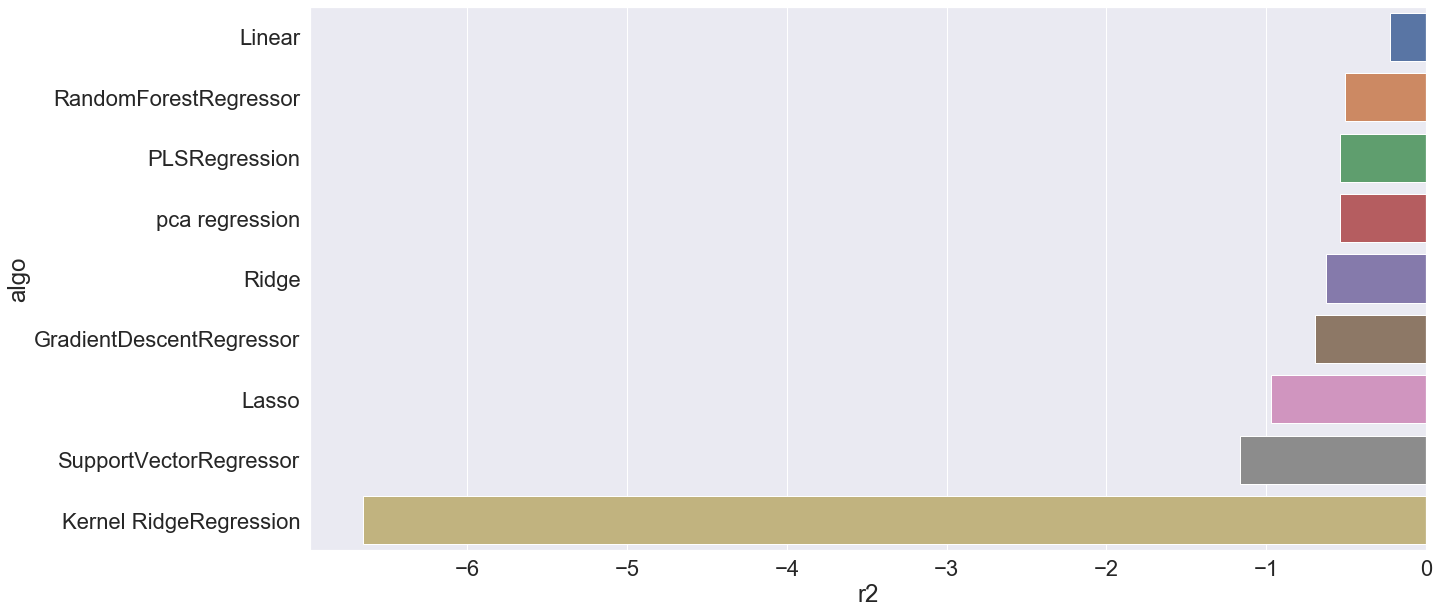

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=2)
output = pd.DataFrame([model_r2.keys(), model_r2.values()], index=["algo","r2"]).T
output.sort_values(["r2"], ascending=False, inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show

# 개망함.......

In [98]:
X3 = mandarine_consume_df2[['man_whole_p']]

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

X_train, X_test, y_train, y_test = train_test_split(
    X3, y, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=seed)

pipe_linear = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', LinearRegression())])
pipe_lasso = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Lasso(random_state=42))])
pipe_ridge = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Ridge(random_state=42))])
pipe_gbr = Pipeline([('scl', MinMaxScaler()),
                       ('fit',GBR())])
pipe_rfr = Pipeline([('scl', MinMaxScaler()),
                       ('fit',RFR())])
pipe_KR = Pipeline([('scl', MinMaxScaler()),
                   ('fit', KernelRidge())])

grid_params_linear = [{"poly__degree" : np.arange(3),
                       "fit__fit_intercept":[True, False]}]
grid_params_lasso = [{"poly__degree" : np.arange(3),
                      "fit__tol":np.logspace(-5,0,10),
                     "fit__alpha": np.logspace(-5,1,10)}]
grid_params_ridge = [{"poly__degree": np.arange(3),
                    "fit__alpha":np.linspace(2,5,10),
                    "fit__solver":["cholesky",'lsqr','sparse_cg'],
                    "fit__tol":np.logspace(-5,0,10)}]


min_samples_split_range = [0.5, 0.7, 0.9]

grid_params_gbr = [{"fit__max_features":["sqrt","log2"],
                    "fit__loss":["ls","lad","huber","quantile"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]

grid_params_rfr = [{"fit__max_features":["sqrt","log2"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]
grid_params_KR = [{"fit__kernel":["rbf","linear"]}]

pipe = [pipe_linear, pipe_lasso, pipe_ridge, 
       pipe_gbr, pipe_rfr, pipe_KR]
params = [grid_params_linear, grid_params_lasso,
         grid_params_ridge, grid_params_gbr,
         grid_params_rfr, grid_params_KR]

jobs = 20
grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'Ridge' ,
    3: "GradientDescentRegressor" ,
    4: "RandomForestRegressor" ,
    5: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx, (param, model) in enumerate(zip(params, pipe)):
    search = GridSearchCV(model, param, iid=True, scoring="neg_mean_squared_error", cv=cv,
                         n_jobs = jobs, verbose=-1)
    search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  20 out of  30 | elapsed:    5.3s remaining:    2.6s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    6.2s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 782 tasks      | elapsed:    1.8s
[Parallel(n_jobs=20)]: Done 1500 out of 1500 | elapsed:    2.8s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 1288 tasks      | elapsed:    2.4s
[Parallel(n_jobs=20)]: Done 3448 tasks      | elapsed:    5.7s
[Parallel(n_jobs=20)]: Done 4500 out of 4500 | elapsed:    7.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)

finish


[Parallel(n_jobs=20)]: Done 120 out of 120 | elapsed:    0.5s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  10 out of  10 | elapsed:    0.0s finished


<function matplotlib.pyplot.show(*args, **kw)>

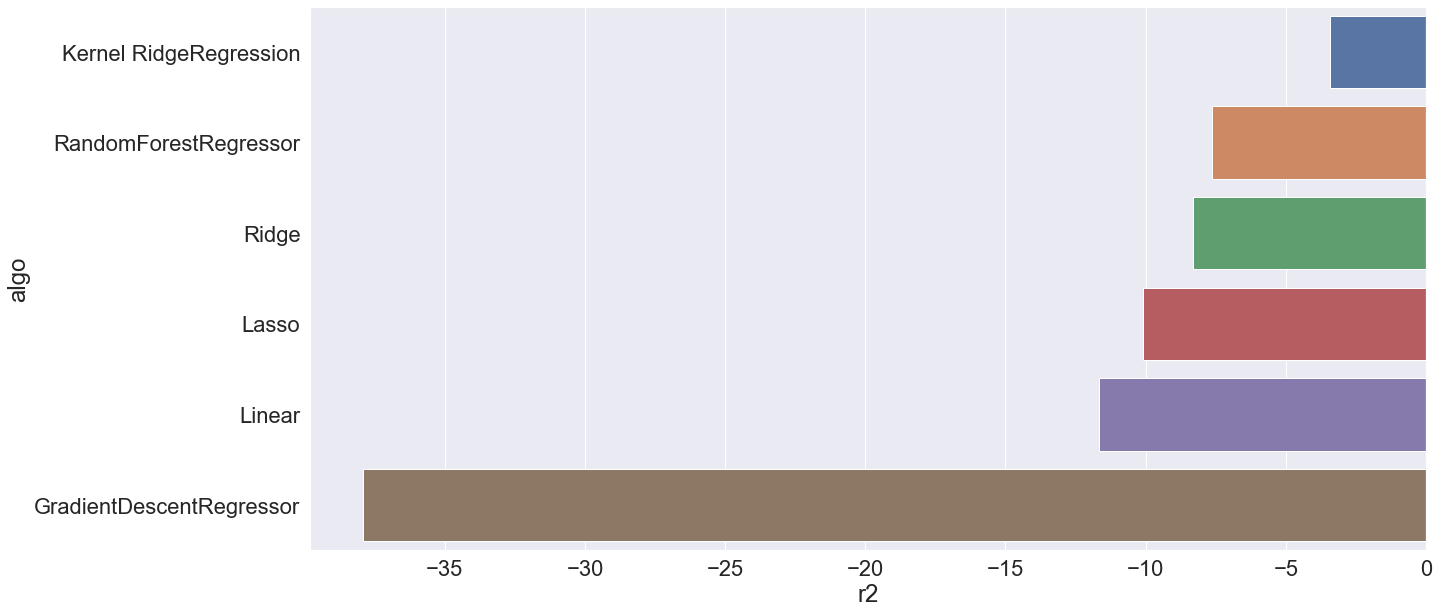

In [99]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=2)
output = pd.DataFrame([model_r2.keys(), model_r2.values()], index=["algo","r2"]).T
output.sort_values(["r2"], ascending=False, inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show

# 개망함.......

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=0)
er = VotingRegressor([('lr',r1),('rf',r2)])
print(er.fit(X,y).predict(X))

[12.2130395  12.7124487  13.48996609 12.82497747 12.26171916 13.12054295
 12.68073922 15.84267741 13.03714266 15.06676226 12.8292102  13.11362087
 13.45165991 13.28855165 14.28944604 12.62325714 12.11314379 11.72609499]


In [96]:
er.score(X,y)

0.9611376657121187